In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Index(['Investigador', 'Docencia_Score', 'Investigacion_Score',
       'Transferencia_Score', 'Gestion_Score'],
      dtype='object')


C:\Users\elisa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


         Docencia_Score  Investigacion_Score  Transferencia_Score  \
Cluster                                                             
0              0.292126             0.129453             0.058034   
1              0.084008             0.090961             0.038234   
2              0.686047             0.524671             0.245102   
3              0.237209             0.159531             0.416278   

         Gestion_Score  
Cluster                 
0             0.107361  
1             0.063207  
2             0.490255  
3             0.269504  


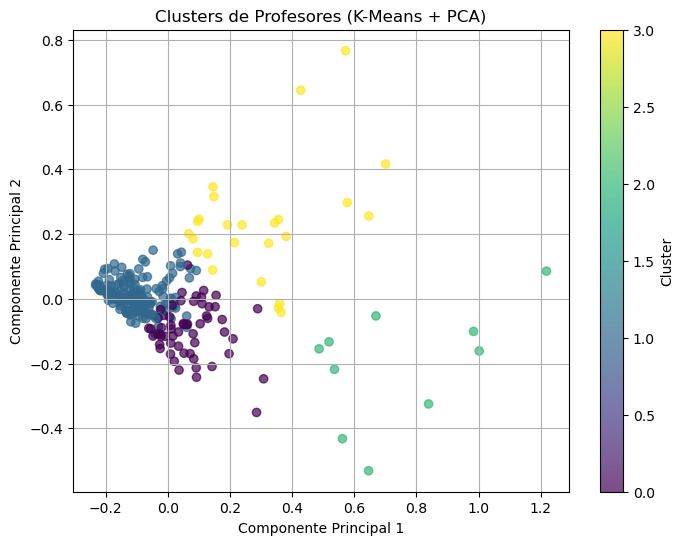

In [2]:
# Cargar tus datos en un DataFrame de pandas
data = pd.read_csv("datos_cluster_colab.csv", sep=";", decimal=",")

# Seleccionamos los datos para el clustering
nombres = data['Investigador']
x = data[["Docencia_Score", "Investigacion_Score", "Transferencia_Score", "Gestion_Score"]]

# Normalizar los datos si es necesario
# Esto puede ser útil si tus características tienen diferentes escalas
# Aquí asumimos que ya están normalizados

# Crear un modelo de K-Means con el número deseado de clusters
clusters = 4
kmeans = KMeans(n_clusters=clusters, random_state=42)

# Entrenar el modelo de K-Means
kmeans.fit(x)

# Unir datos y clusters
data_con_cluster = data.copy()
data_con_cluster['Cluster'] = kmeans.labels_
# Ver promedio por cluster
print(data_con_cluster.groupby('Cluster')[["Docencia_Score", "Investigacion_Score", "Transferencia_Score", "Gestion_Score"]].mean())

resultado = pd.DataFrame({
    'Investigador': nombres,
    'Cluster': kmeans.labels_
})

resultado.to_excel('profesores_clusters.xlsx', index=False)

# Reducir a 2 dimensiones con PCA para graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# Graficar
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title('Clusters de Profesores (K-Means + PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()